# K Nearest Neighbors

In this notebook we will use some classified data, but we don't know what each column represent. This is a very common scenario in real world problem, because sometimes, to protect customers, company doesn't specify the meaning of each feature.
We will use K Nearest Neighbors to classify the data

In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [7]:
# Read the dataset
df = pd.read_csv('Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


When we use K Nearest Neighbors as a classifier, it is common practice to standardize all the data to the same scale, since the algorithm uses the distance between osservation as metric to classify them. 

In [11]:
# Create an instance of a scaler
scaler = StandardScaler()
# Fit the scaleror the data
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ..., 
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
# Create a scaled DataFrame
df_scaled = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Now we will split the data into train and test set

In [51]:
X = df_scaled
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## K Nearest Neighbor K = 1 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
# Create a KNN instance
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predictions

In [54]:
predictions = knn.predict(X_test)

In [55]:
print('Confusion matrix : ')
print(confusion_matrix(y_test, predictions))

Confusion matrix : 
[[134   8]
 [ 11 147]]


In [56]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      0.94      0.93       142
          1       0.95      0.93      0.94       158

avg / total       0.94      0.94      0.94       300



From the results we can notice that with K = 1 we are able to get an F1_score of 0.94, which seems to be a very good result. 
Let's now explore other values of K to see if the results can improve or not

# Best K Value

We will apply the K Nearest Neighbor algorithm with different values of K, to see which one has the lowest error rate

In [57]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

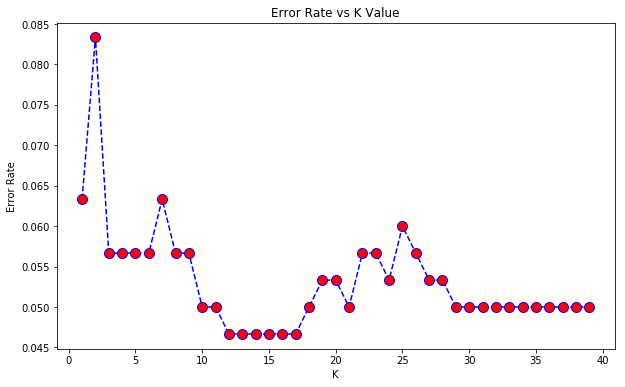

In [59]:
# Plot 
plt.figure(figsize = (10, 6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As we can see from this plot, the best value of K seems to be from 12 to 17. We will pick 17 and see how the classification report change with this new value of K

In [61]:
knn = KNeighborsClassifier(n_neighbors =  17)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       142
          1       0.96      0.95      0.96       158

avg / total       0.95      0.95      0.95       300



In [64]:
print(confusion_matrix(y_test, predictions))

[[136   6]
 [  8 150]]


As we can see from these results, the f1-score increase to 0.95. The increase is not so big, since the results were already very good before, but in this way we know that we have the lowest possible error.